# GDELT and Migration Social Network Analysis

## Migration Social Network Analysis

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')

In [4]:
import pandas as pd

In [5]:
from src.network import build_year_migration_network, report_G_info, get_G_info, get_top_values, visualise_graph, create_subgraph

/Users/penda/Documents/uni/socialnetw/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
migration_df = pd.read_csv("../data/migration_bilateral.csv")
migration_df = migration_df.drop(columns=["inflow", "outflow"])
migration_df

,iso_or,origin,iso_des,destination,year,stock,flow
0,AAB,Antigua and Barbuda,ABW,Aruba,1960,16,NaN
1,AAB,Antigua and Barbuda,ABW,Aruba,1961,16,0.0
2,AAB,Antigua and Barbuda,ABW,Aruba,1962,15,-1.0
3,AAB,Antigua and Barbuda,ABW,Aruba,1963,15,0.0
4,AAB,Antigua and Barbuda,ABW,Aruba,1964,15,0.0
...,...,...,...,...,...,...,...
2889683,ZIM,Zimbabwe,ZAM,Zambia,2016,13239,150.0
2889684,ZIM,Zimbabwe,ZAM,Zambia,2017,13782,629.0
2889685,ZIM,Zimbabwe,ZAM,Zambia,2018,14670,976.0
2889686,ZIM,Zimbabwe,ZAM,Zambia,2019,15720,1142.0


### Sample analysis of the migration social network for 2011

In [7]:
g = build_year_migration_network(migration_df, 2011)

In [8]:
info = get_G_info(g)

In [9]:
report_G_info(info)

node_num: 236
edge_num: 42305
density: 0.7628020194734945
reciprocity: 0.9578396890040726
diameter: inf
weak_component_num: 1
strong_component_num: 9


In [10]:
top_in_degrees = get_top_values(info["in_degrees"], 10)
top_in_degrees

[('USA', 44296929),
 ('RUS', 11299535),
 ('GMY', 11269091),
 ('SAU', 9104314),
 ('UAE', 7578348),
 ('FRN', 7413316),
 ('UKG', 7318698),
 ('CND', 6954116),
 ('SPN', 6343589),
 ('AUL', 6212863)]

USA, Russia, Germany, Saudi Arabia, United Arab Emirates, France, United Kingdom, Canada, Spain, Australia, are the countries with the highest number of incoming migrants.

In [11]:
top_out_degrees = get_top_values(info["out_degrees"], 10)
top_out_degrees

[('IND', 13920086),
 ('MEX', 12511665),
 ('RUS', 10144786),
 ('CHN', 9065008),
 ('BNG', 6594830),
 ('UKR', 5503267),
 ('AFG', 5380606),
 ('PAK', 5049536),
 ('PHI', 4882991),
 ('UKG', 4362110)]

India, Mexico, Russia, China, Bangladesh, Ukraine, Afghanistan, Pakistan, Philipines, United Kingdom, have the highest number of outgoing migrants.

In [12]:
top_betweenness = get_top_values(info["betweenness"], 10)
top_betweenness

[('USA', 0.010044164655638505),
 ('FRN', 0.009538607818787083),
 ('UKG', 0.009414952157350248),
 ('AUL', 0.008897019968798804),
 ('CND', 0.007480996876873242),
 ('NTH', 0.007021456220243323),
 ('NOR', 0.005194647624952041),
 ('ITA', 0.004848068149137328),
 ('ICE', 0.0042012433468671785),
 ('DOM', 0.004195819312920696)]

USA, France, United Kingdom, Australia, Canada, The Netherlands, Norway, Italy, Iceland, Dominican Republic, seem to have the highest betweenness centrality. 

That means these countries are key hubs in this graph (critical transit countries in global migration flows). These countries act as important bridges or gatekeepers within the global migration network.

In [13]:
top_clusteringcoeffs = get_top_values(info["clustering_coefficients"], 20)
top_clusteringcoeffs

[('CZE', 1.0),
 ('SCG', 1.0),
 ('SUN', 1.0),
 ('ESH', 1.0),
 ('VAT', 1.0),
 ('TKL', 1.0),
 ('NAU', 1.0),
 ('SPM', 1.0),
 ('YUG', 1.0),
 ('TAW', 1.0),
 ('GIB', 1.0),
 ('LBR', 0.9978556023919224),
 ('RWA', 0.9978556023919224),
 ('BHU', 0.9978556023919224),
 ('SIE', 0.9978556023919224),
 ('SNM', 0.9978556023919224),
 ('TCA', 0.9978556023919224),
 ('GAB', 0.9978556023919224),
 ('MYA', 0.9978556023919224),
 ('SAL', 0.9978556023919224)]

Gibraltar, Saint Pierre and Miquelon, Czechia, Taiwan, Former Soviet Union, Vatican City, Tokelau, Serbia and Montenegro, Yugoslavia, Nauru, Western Sahara seem to have the highest clustering coefficients.

A high clustering coefficient for a particular country in a migration network suggests that the set of countries it is directly connected to (the countries sending migrants to it or receiving migrants from it) also tend to be interconnected with each other. So, its neighborhood forms a tightly knit group.

### Example of a subgraph and how it looks like visualised

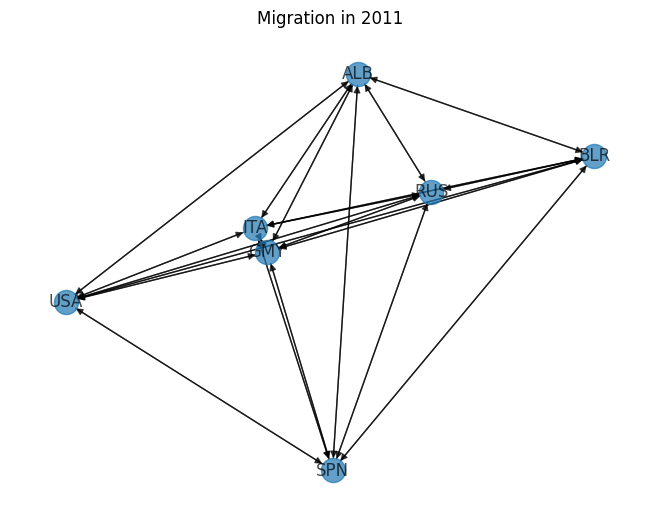

In [14]:
subgraph = create_subgraph(g, ['ALB', 'BLR', 'GMY', 'USA', 'CHE', 'AUT', 'ITA', 'GBK', 'RUS', 'SPN'])
visualise_graph(subgraph)

### Analyse the full social network and see how the main nodes change through out the years

In [15]:
from src.network import build_full_migration_network, get_full_info

In [ ]:
G = build_full_migration_network(migration_df)

In [ ]:
info_full = get_full_info(G)

#### Plot centralities as animations through years

In [ ]:
from src.network import plot_bar, get_animation

In [ ]:
an = get_animation(info_full)
an.save("../gifs/top_betweenness.gif")

In [ ]:
an_out = get_animation(info_full, measure="out_degrees")
an_out.save("../gifs/out_degrees.gif")

In [ ]:
an_in = get_animation(info_full, measure="in_degrees")
an_in.save("../gifs/in_degrees.gif")

## GDELT Social Network Analysis

In [ ]:
import networkx as nx

from src.analysis import *
from src.data import *
from src.network import *
from src.plot import *
from src.main import *

In [ ]:
data_paths = {dataset: "" + path for dataset, path in DATA_PATHS.items()}

In [ ]:
gdelt = get_gdelt(data_paths['gdelt'])
gdelt.clean_data()

networks = gdelt_network_vanilla(gdelt, years=range(2000, 2025))
# plot_yearly_centralities(networks)
plot_yearly_communities(networks)

In [ ]:
plot_network(gdelt)

## Shuffle Test

Want to determine whether the intensity of certain types of GDELT events in year t (negative/positive sentiment events from Country A towards Country B) predicts an increase or decrease in migration flows from A to B in year t+1, controlling for other factors.

In [ ]:
from src.network import run_shuffle_test

In [ ]:
gdelt_df = pd.read_csv("../data/gdelt_social.csv") 
migration_df = pd.read_csv("../data/migration_bilateral.csv")

In [ ]:
gdelt_df

In [ ]:
migration_df = migration_df.drop(columns=["inflow", "outflow"])
migration_df

In [ ]:
years = list(range(1979,2019))

In [ ]:
results_df = run_shuffle_test(gdelt_df, migration_df, years, weight_col_migration="stock")
results_df

A series of annual tests comparing the observed correlations between GDELT-based measures and migration stock to a null distribution created by shuffling, each entry showing:

year: the year analyzed.
observed_corr: The correlation observed in the actual data for that year between the chosen GDELT-based measure and migration stock.
p_value: The probability that a correlation as extreme as the observed one could occur by random chance if there were no true relationship.
null_mean & null_std: The mean and standard deviation of the correlation values generated by shuffled (null) datasets.

Patterns:

- observed correlations: All observed correlations are negative and generally small in magnitude. This indicates that in each year, the raw data show a slight tendency for the variables to move in opposite directions, but the effect sizes are quite modest.

- statistical significance (p_value): Many years have p-values well above 0.05, indicating no statistically significant difference from what would be expected by chance.
Some years stand out with lower p-values:
For example, year 2009 has a p-value of 0.028, year 2011 has 0.071 (marginal), 1984 has 0.05, and year 2018 has 0.022. Values below 0.05 suggest that the observed negative correlation that year is somewhat unlikely to have arisen by random chance.
These instances might imply that for those particular years, there is a statistically detectable pattern that diverges from randomness. However, the correlation magnitudes remain small, so even if it’s statistically significant, it’s not very strong.

- The null means are close to zero, and the standard deviations are small (mostly around 0.02 or less). This indicates that under the null scenario (no real relationship), correlations center near zero and do not vary wildly. When you get an observed correlation noticeably more negative than zero that beats the random distribution, that’s when the p-value falls below 0.05.

Interpretation:

- For most years, the negative correlations are not statistically distinguishable from what you might get through random shuffling, suggesting no clear evidence of a genuine influence relationship.
- A few isolated years show a statistically significant negative correlation, meaning in those years the data deviate from chance in a consistent direction. Still, the correlations are quite small, so even in these cases, the practical significance is questionable.
- Because statistical significance can sometimes arise due to multiple comparisons or noise, and because effect sizes are small, it’s best to be cautious. Without a theoretical reason why certain years should differ, these occasional significant results might be anomalies rather than meaningful patterns.

Possible explanations for the significant years we encountered:
- 1984: Ethiopia experienced a catastrophic famine due to drought and political instability, leading to the displacement of millions to neighbouring countries and beyond. The assassination of Indian Prime Minister Indira Gandhi in 1984 led to anti-Sikh riots, causing internal displacement and prompting some to seek asylum abroad.
- 2009: The aftermath of the 2008 financial crisis led to economic downturns worldwide. Economic hardships in various countries may have prompted individuals to migrate in search of better opportunities. The end of the civil war in Sri Lanka in 2009 also resulted in significant internal displacement.
- 2011: Syrian Civil War - Beginning in 2011, the Syrian conflict led to one of the largest refugee crises in recent history, with millions fleeing to neighboring countries and Europe. Arab Spring - A series of uprisings across the Middle East and North Africa in 2011 resulted in political instability and conflicts, prompting increased migration from affected regions.
- 2018: Severe droughts in Central America's Dry Corridor, exacerbated by climate change, led to crop failures and food insecurity, driving migration towards the United States. Venezuelan Economic Crisis - By 2018, Venezuela's economic collapse had resulted in shortages of basic necessities, leading to a mass exodus of citizens to neighboring countries.

The data mostly show no strong or consistent evidence of a meaningful relationship. In a few isolated years, there appears to be a statistically significant negative association, but the effect sizes are small and could be due to chance or other unmodeled factors.